Video files found: ['person15_jogging_d1_uncomp.avi', 'person15_handwaving_d1_uncomp.avi', 'person15_walking_d1_uncomp.avi', 'person15_boxing_d1_uncomp.avi', 'person15_handclapping_d1_uncomp.avi', 'person15_running_d1_uncomp.avi']
Dataset shape: (6, 20, 64, 64, 1)
x shape: (6, 19, 64, 64, 1), y shape: (6, 19, 64, 64, 1)
x_train shape: (4, 19, 64, 64, 1), y_train shape: (4, 19, 64, 64, 1)
x_val shape: (2, 19, 64, 64, 1), y_val shape: (2, 19, 64, 64, 1)


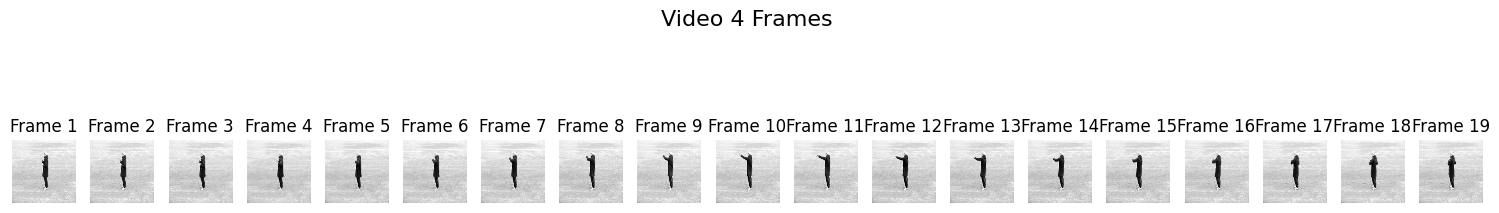

In [22]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Параметры для обработки видео
IMG_HEIGHT = 64
IMG_WIDTH = 64
NUM_FRAMES = 20  # Количество кадров, которые извлекаем из каждого видео

# Если видеофайлы на Google Диске, подключаем его
video_folder_path = "/home/jupyter/datasphere/project/video"  # Замените на путь к вашей папке с видео

# Если файлы уже загружены в Colab, указываем путь к папке
# video_folder_path = "/content/videos"  # Используйте этот путь, если загружали файлы через интерфейс

# Список всех видеофайлов в папке
video_files = os.listdir(video_folder_path)
print(f"Video files found: {video_files}")

# Функция для загрузки и обработки видео из AVI
def load_video(video_path, num_frames=NUM_FRAMES, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    cap = cv2.VideoCapture(video_path)
    frames = []

    while cap.isOpened() and len(frames) < num_frames:
        ret, frame = cap.read()
        if not ret:
            break
        # Преобразуем кадр в grayscale и изменяем его размер
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame_resized = cv2.resize(frame, (img_width, img_height))
        frames.append(frame_resized)

    cap.release()

    # Преобразуем список кадров в numpy массив и добавляем измерение канала
    frames = np.array(frames)
    frames = np.expand_dims(frames, axis=-1)  # (num_frames, height, width, 1)
    return frames

# Функция для загрузки всех видео по именам файлов
def load_videos_by_names(folder_path, video_files, num_frames=NUM_FRAMES, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    video_data = []

    # Проходим по всем видеофайлам в списке
    for video_file in video_files:
        video_path = os.path.join(folder_path, video_file)
        frames = load_video(video_path, num_frames, img_height, img_width)
        video_data.append(frames)

    # Теперь возвращаем массив, где каждый элемент — это видео (не склеиваем все кадры)
    return np.array(video_data)

# Загружаем все видео по списку имен
dataset = load_videos_by_names(video_folder_path, video_files)
print(f"Dataset shape: {dataset.shape}")  # (num_videos, num_frames, height, width, channels)

# Нормализуем данные в диапазон [0, 1]
dataset = dataset / 255.0
# Функция для создания сдвигов кадров
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y
x, y = create_shifted_frames(dataset)


print(f"x shape: {x.shape}, y shape: {y.shape}")
# Применяем функцию для создания x и y
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
# Визуализируем кадры из train набора


def visualize_video_frames(data, video_index=None, num_frames=20):
    """
    Визуализация кадров из одного видео.
    Если `video_index` не указан, выбирается случайное видео.
    """
    # Если video_index не задан, выбираем случайное видео
    if video_index is None:
        video_index = np.random.randint(0, data.shape[0])

    # Извлекаем кадры выбранного видео
    video_frames = data[video_index]
    num_frames = min(num_frames, video_frames.shape[0])

    # Визуализация
    fig, axes = plt.subplots(1, num_frames, figsize=(15, 3))
    fig.suptitle(f"Video {video_index + 1} Frames", fontsize=16)

    for idx in range(num_frames):
        ax = axes[idx]
        frame = video_frames[idx, :, :, 0]  # Убираем измерение канала для отображения
        ax.imshow(frame, cmap='gray')
        ax.set_title(f"Frame {idx + 1}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Визуализируем случайное видео из train набора

visualize_video_frames(x_train)


Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 0.9844 - val_loss: 0.7005 - lr: 1.0000e-05
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 0.9535 - val_loss: 0.7002 - lr: 1.0000e-05
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 0.9241 - val_loss: 0.6998 - lr: 1.0000e-05
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 0.8967 - val_loss: 0.6994 - lr: 1.0000e-05
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 0.8718 - val_loss: 0.6989 - lr: 1.0000e-05
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 0.8493 - val_loss: 0.6983 - lr: 1.0000e-05
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 0.8291 - val_loss: 0.6978 - lr: 1.0000e-05
Epoch 8/50
1/1 [==============================] - 3s 3s/step - loss: 0.8104 - val_loss: 0.6972 - lr: 1.0000e-05
Epoch 9/50
1/1 [==============================] - 3s 3s/step - loss: 0.7928 - val_loss: 0.6966 - lr: 1

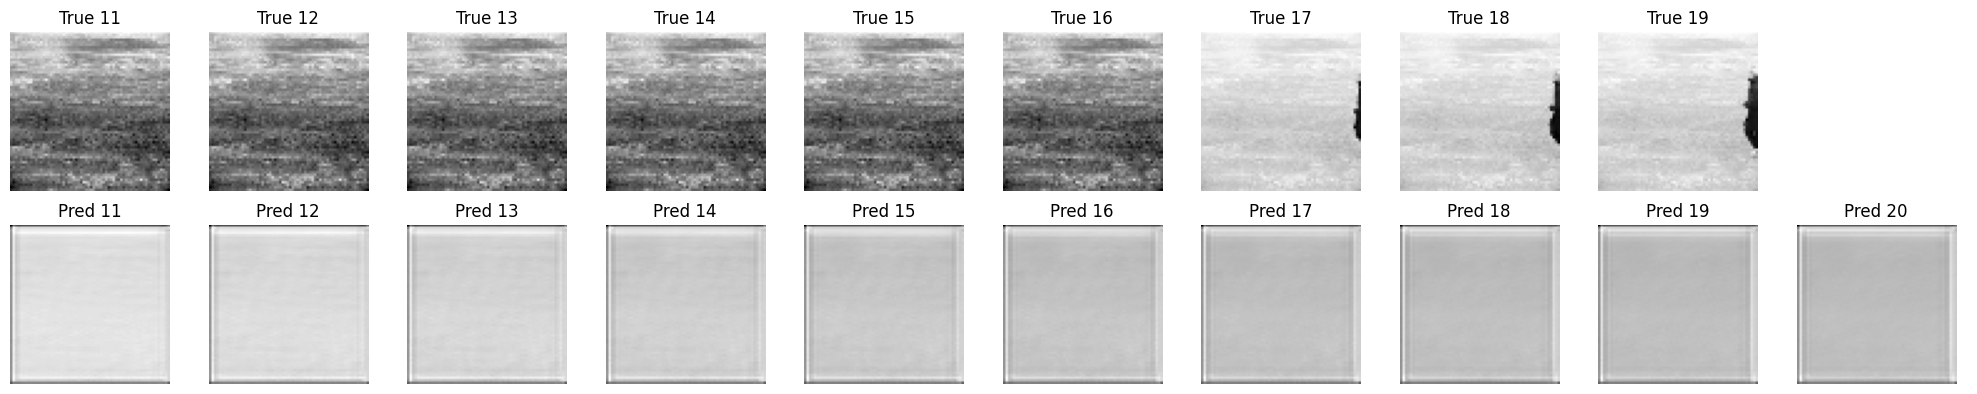

In [23]:
from keras import layers, models, callbacks, losses, optimizers
import matplotlib.pyplot as plt
import numpy as np

# Параметры модели
epochs = 50
batch_size = 5

# Определение модели на основе ConvLSTM2D
def build_model(input_shape):
    inp = layers.Input(shape=input_shape)
    x = layers.ConvLSTM2D(
        filters=64,
        kernel_size=(5, 5),
        padding="same",
        return_sequences=True,
        activation="relu",
    )(inp)
    x = layers.BatchNormalization()(x)
    x = layers.ConvLSTM2D(
        filters=64,
        kernel_size=(3, 3),
        padding="same",
        return_sequences=True,
        activation="relu",
        kernel_initializer='he_normal',
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ConvLSTM2D(
        filters=64,
        kernel_size=(1, 1),
        padding="same",
        return_sequences=True,
        activation="relu",
        kernel_initializer='he_normal',
    )(x)
    x = layers.Conv3D(
        filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
    )(x)

    model = models.Model(inp, x)
    return model

# Инициализация модели
input_shape = (None, *x_train.shape[2:])  # Форма входа: (кол-во кадров, высота, ширина, каналы)
model = build_model(input_shape)
model.compile(
    loss=losses.binary_crossentropy,
    optimizer=optimizers.Adam(learning_rate=1e-5, clipnorm=1.0),
)

# Колбэки для обучения
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=5)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_loss", patience=3)

# Обучение модели
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

# Прогнозирование на основе обученной модели
def generate_frames(model, example, num_generated=10):
    """
    Функция для предсказания следующих кадров на основе модели.
    """
    frames = example[:10, ...]  # Берём первые 10 кадров
    original_frames = example[10:, ...]  # Оставшиеся кадры для сравнения

    # Генерация новых кадров
    for _ in range(num_generated):
        # Прогнозируем следующий кадр
        new_prediction = model.predict(np.expand_dims(frames, axis=0))
        predicted_frame = new_prediction[:, -1, ...]  # Последний предсказанный кадр
        frames = np.concatenate((frames, predicted_frame), axis=0)

    return frames, original_frames

# Выбираем случайный пример из валидационного набора
example_index = np.random.choice(range(len(x_val)))
example = x_val[example_index]

# Генерируем новые кадры
generated_frames, original_frames = generate_frames(model, example)

# Визуализация оригинальных и предсказанных кадров
fig, axes = plt.subplots(2, 10, figsize=(20, 4))

# Исходные кадры
for idx, ax in enumerate(axes[0]):
    if idx < original_frames.shape[0]:
        ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
        ax.set_title(f"True {idx + 11}")
    ax.axis("off")

# Предсказанные кадры
predicted_frames = generated_frames[10:]
for idx, ax in enumerate(axes[1]):
    if idx < predicted_frames.shape[0]:
        ax.imshow(np.squeeze(predicted_frames[idx]), cmap="gray")
        ax.set_title(f"Pred {idx + 11}")
    ax.axis("off")

plt.tight_layout()
plt.show()
